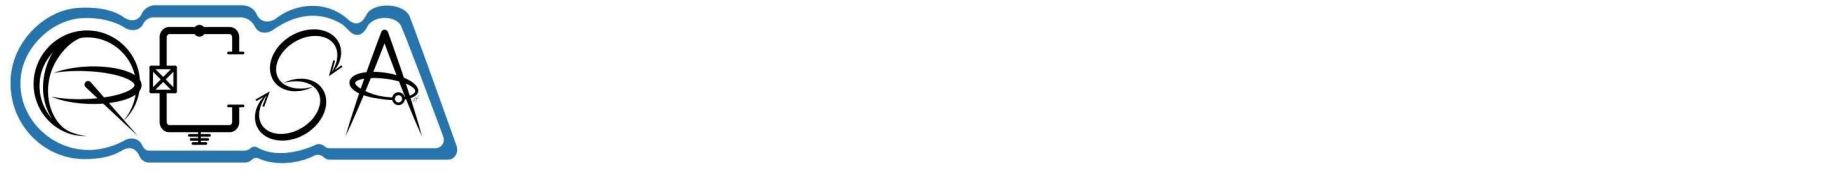

# Intro to Qiskit Workshop

This QCSA workshop is intended to be a very basic intro to qiskit, IBM's Python package for quantum computing and quantum information science. If you couldn't make our Intro to Quantum Computing workshop, check out the slides or notebook to get up to speed on the basics, paying particular attention to the qubits and quantum circuits sections.

To run this notebook, you'll need the qiskit, numpy, and matplotlib packages installed as well as a jupyter notebook environment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from qiskit import *
from qiskit.providers.aer import Aer
from qiskit.visualization import plot_bloch_vector, plot_histogram, array_to_latex, plot_state_city

## Overview

- Review of Quantum Computing Basics
- Quantum Gates
- Quantum Circuits
- Simulating and Running Circuits
- Quantum Algorithms
- Learn More


## Review of Quantum Computing Basics
### Qubits

<b>Qubit</b>: a quantum 2-level system

- Basis states $|0\rangle$ and $|1\rangle$
- General state is a superposition of basis states, $\alpha|0\rangle+\beta|1\rangle$
- Bloch sphere representation: $\cos{(\theta/2)}|0\rangle+e^{i\phi}\sin{(\theta/2)}|1\rangle$

In [ ]:
state_spherical = [1, 0, 0] # qubit state as r, theta, phi
# r should always be 1 to ensure normalization

plot_bloch_vector(state_spherical, coord_type = 'spherical')

In [ ]:
state_cartesian = [0, 1, 1] # define the x,y,z coordinates of your state on the Bloch sphere
state_cartesian_norm = state_cartesian / np.linalg.norm(state_cartesian) # normalizes the state

plot_bloch_vector(state_cartesian_norm)

### Entanglement

Multi-qubit states

- Basis is a combination of single-qubit basis states, $|00\rangle$, $|01\rangle$, $|10\rangle$, $|01\rangle$
- General state is a superposition
- For entangled qubits, can't separate states

$\frac{1}{2}\left(|00\rangle+|01\rangle-|10\rangle-|11\rangle\right)\leftrightarrow\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\otimes\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$

$\frac{1}{\sqrt{3}}\left(|00\rangle+|01\rangle-|11\rangle\right)$

### Measurement

Single qubit: $\alpha|0\rangle+\beta|1\rangle$

All qubits of a multi-qubit state: $a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle$

One qubit of a multi-qubit state

- Not entangled: $\frac{1}{2}\left(|00\rangle+|01\rangle-|10\rangle-|11\rangle\right)$
- Entangled: $\frac{1}{\sqrt{3}}\left(|00\rangle+|01\rangle-|11\rangle\right)$

Measured $|0\rangle$: $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$

Measured $|1\rangle$: $|1\rangle$

## Quantum Gates

Matrix form: $\alpha|0\rangle+\beta|1\rangle\to\begin{pmatrix}\alpha\\ \beta\end{pmatrix}$

<b>Quantum Gates</b>: Operations on states that can be written as a matrix

### Single Qubit Gates

<b>X, Y, and Z Gates</b>

$X=\begin{pmatrix}0&1\\1&0\end{pmatrix}$

$Y=\begin{pmatrix}0&-i\\i&0\end{pmatrix}$

$Z=\begin{pmatrix}1&0\\0&-1\end{pmatrix}$

In [ ]:
qcx = QuantumCircuit(1) # defining a quantum circuit with 1 qubit
qcx.x(0) # add an X gate
qcx.draw('mpl') # draw the circuit

<b>The Hadamard Gate</b>

$H=\frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$

In [ ]:
qch = QuantumCircuit(1)
qch.h(0)
qch.draw('mpl')

See a list of other standard single qubit gates [here](https://raw.githubusercontent.com/qiskit-community/qiskit-textbook/main/content/ch-states/supplements/single-gates-cheatsheet.pdf).

**Exercise: Build a quantum circuit that will put the Bloch vector on the -X axis.**

In [ ]:
qcx = QuantumCircuit(1)

# add your gates here


qcx.draw('mpl')

### Multi Qubit Gates

<b>CNOT Gate</b>

Does an X or NOT gate on a target qubit conditional on the state of a control qubit.

In [ ]:
qccx = QuantumCircuit(2)
qccx.cx(0, 1)
qccx.draw('mpl')

**Exercise: Make a 2-qubit circuit that will end in the state $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$.**

In [ ]:
qc2b = QuantumCircuit(2)

# add your gates here


qc2b.draw('mpl')

<b>Swap Gate</b>

Swaps the states of 2 qubits

In [ ]:
qcswap = QuantumCircuit(2)
qcswap.swap(0, 1)
qcswap.draw('mpl')

**Exercise: Use single qubit gates and CNOT gates to make a SWAP gate.**

In [ ]:
qcswap2 = QuantumCircuit(2)

# add your gates here


qcswap2.draw('mpl')

### Other Gates in Qiskit

These gates and others can be found in Qiskit's [circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html).

In [ ]:
from qiskit.circuit.library import *

In [ ]:
xgate = XGate()
array_to_latex(xgate.to_matrix())

In [ ]:
qcx2 = QuantumCircuit(1)
qcx2.append(xgate, [0])
qcx2.draw('mpl')

Multiply controlled gates: like CNOT but with several controls and arbitrary operations

In [ ]:
cx5 = MCXGate(5)

qccx5 = QuantumCircuit(6)
qccx5.append(cx5, [0, 1, 2, 4, 5, 3])
qccx5.draw('mpl')

### Creating Gates

In [ ]:
from qiskit.quantum_info.operators import Operator

In [ ]:
hdef = Operator([
    [1 / np.sqrt(2), 1 / np.sqrt(2)],
    [1 / np.sqrt(2), -1 / np.sqrt(2)]
])

qch2 = QuantumCircuit(1)
qch2.unitary(hdef, [0], label = 'H')
qch2.draw('mpl')

## Quantum Circuits

### Defining Circuits and Registers

<b>Register</b>: Collection of qubits or bits in your circuit

- quantum register: computational qubits and ancilla qubits
- classical register: classical bits for results of measurements

In [ ]:
qc_simple = QuantumCircuit(2, 2) # number of qubits, number of classical bits

In [ ]:
qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(4, 'c')

qc_registers = QuantumCircuit(qr, anc, cr)

Just adding some gates to show you the syntax

In [ ]:
qc_simple.h(0)
qc_simple.cx(0, 1)
qc_simple.x(1)
qc_simple.h([0, 1])

qc_simple.draw('mpl')

In [ ]:
qc_registers.h(qr[0])
qc_registers.cx(qr[0], anc[0])
qc_registers.h(qr[1])
qc_registers.x(qr[1])
qc_registers.ccx(qr[0], qr[1], qr[2])
qc_registers.x(qr)
qc_registers.cx(qr[2], anc[0])

qc_registers.draw('mpl')

### Measuring Qubits

In [ ]:
qc_simple.measure([0, 1], [0, 1])
qc_simple.measure_all()

qc_simple.draw('mpl')

In [ ]:
qc_registers.measure(qr, cr[0:3])
qc_registers.measure(anc, cr[3])

qc_registers.draw('mpl')

**Exercise: Define a circuit with 2 computational qubits, 1 ancilla qubit, and 1 classical bit. Then, add gates such that the ancilla is $|0\rangle$ if the computational qubits are the state, and $|1\rangle$ otherwise (this is called a half adder). Finally, make a measurement using the classical bit.**

In [ ]:
# write your code here


### Importing and Exporting Circuits

In [ ]:
from qiskit.circuit.random import random_circuit

In [ ]:
rand = random_circuit(3, 3, measure = True)
rand.draw('mpl')

In [ ]:
rand.qasm(formatted = True, filename = 'random_circuit.qasm')

Now, I'm going to import the circuit again, so that you can run or simulate it.

In [ ]:
imported = QuantumCircuit.from_qasm_file('random_circuit.qasm')

imported.draw('mpl')

## Simulating and Running Circuits

$|000\rangle\to\cos{(\theta/2)}|010\rangle+e^{i\phi}\sin{(\theta/2)}|101\rangle$

In [ ]:
theta = np.pi / 3 # these parameters give the original state
phi = np.pi / 3

def qc_create():
    qc = QuantumCircuit(3, 3)

    qc.u(theta, phi, 0, 0)
    qc.x(1)
    qc.cx(0, 2)
    qc.cx(0, 1)
    
    return qc

demo = qc_create()
demo.draw('mpl')

### Qasm Simulator

In [ ]:
qc_1 = qc_create()
qc_1.measure([0, 1, 2], [0, 1, 2])
#qc_1.draw('mpl')

In [ ]:
sim1 = Aer.get_backend('qasm_simulator')

res1 = execute(qc_1, sim1).result()
counts1 = res1.get_counts(qc_1)
plot_histogram(counts1)

In [ ]:
exp_0 = np.cos(theta / 2)**2
exp_1 = np.sin(theta / 2)**2

res_0 = counts1['010']
res_1 = counts1['101']
tot = res_0 + res_1

print('For the |010> state, we expect a probability of ' + str(round(exp_0, 4)) + ' and get a probability of ' + str(round(res_0 / tot, 4)))
print('For the |101> state, we expect a probability of ' + str(round(exp_1, 4)) + ' and get a probability of ' + str(round(res_1 / tot, 4)))

### Statevector Simulator

In [ ]:
qc_2 = qc_create()
#qc_2.draw('mpl')

In [ ]:
sim2 = Aer.get_backend('statevector_simulator')

res2 = execute(qc_2, sim2).result()
vec2 = res2.get_statevector(qc_2)
plot_state_city(vec2)

In [ ]:
print(vec2)

In [ ]:
amp_0 = vec2[2]
amp_1 = vec2[5]

print('For the |010> state of qubit 2, we expect an amplitude of ' + str(np.round(np.cos(theta / 2), 4)) + ' and get an amplitude of ' + str(np.round(amp_0, 4)))
print('For the |101> state of qubit 2, we expect an amplitude of ' + str(np.round(np.e**(1j * phi) * np.sin(theta / 2), 4)) + ' and get an amplitude of ' + str(np.round(amp_1, 4)))

### Unitary Simulator

In [ ]:
qc_3 = qc_create()
#qc_3.draw('mpl')

In [ ]:
sim3 = Aer.get_backend('unitary_simulator')

res3 = execute(qc_3, sim3).result()
unitary3 = res3.get_unitary(qc_3)
#array_to_latex(unitary3)

In [ ]:
initial_state = [1, 0, 0, 0, 0, 0, 0, 0]
vec3 = np.dot(unitary3, initial_state)

array_to_latex(vec3)

In [ ]:
amp_0 = vec3[2]
amp_1 = vec3[5]

print('For the |010> state, we expect an amplitude of ' + str(np.round(np.cos(theta / 2), 4)) + ' and get an amplitude of ' + str(np.round(amp_0, 4)))
print('For the |101> state, we expect an amplitude of ' + str(np.round(np.sin(theta / 2) * np.e**(1j * phi), 4)) + ' and get an amplitude of ' + str(np.round(amp_1, 4)))

### Running on Hardware

To make this work, you'll have to set up an account with IBM and put in your own API token. This part is free, but be aware that some simulators and machines cost money to use.

In [ ]:
from qiskit import IBMQ

In [ ]:
qc_4 = qc_create()
qc_4.measure([0, 1, 2], [0, 1, 2])
#qc_4.draw('mpl')

Get your API token by making an account [here](https://quantum-computing.ibm.com/) and paste it into the quotation marks.

In [ ]:
IBMQ.save_account("") # put in your personal token, provided by IBM, here
provider = IBMQ.load_account()

The backends labeled open, which should be the only ones that show up for you, are free.

In [ ]:
provider.backends()

In [ ]:
backend = provider.get_backend('ibmq_quito')
optimized_circuit = qiskit.transpile(qc_4, backend)

print('Name: ' + backend.name())
print('Number of qubits: ' + str(backend.configuration().n_qubits))
print('Simulator? ' + str(backend.configuration().simulator))

In [ ]:
optimized_circuit.draw('mpl')

In [ ]:
job = execute(optimized_circuit, backend = backend, shots = 1000)

In [ ]:
job.status()

In [ ]:
res4 = job.result()
counts4 = res4.get_counts()
plot_histogram(counts4)

In [ ]:
res_0 = counts4['010']
res_1 = counts4['101']
tot = 1000

print('For the |010> state, we expect a probability of ' + str(round(exp_0, 4)) + ' and get a probability of ' + str(round(res_0 / tot, 4)))
print('For the |101> state, we expect a probability of ' + str(round(exp_1, 4)) + ' and get a probability of ' + str(round(res_1 / tot, 4)))

## Quantum Algorithms

We're not going to step through any algorithms in detail, but here are a few of the better known ones to be aware of:

- **Deutsch–Jozsa algorithm:** solves the 'black box' problem, where a mystery function is either constant or balanced. Other similar algorithms are the Bernstein-Vazirani algorithm and Simon's algorithm.
- **Quantum Fourier Transform:** the quantum version of a Fourier transform, which extracts frequencies from functions of time. This is very often used as a component of other algorithms.
- **Quantum Phase Estimation Algorithm:** lets you estimate the phase of the eigenvectors (one of the most important properties) of a quantum operator, also often used in other algorithms.
- **Shor's Algorithm:** allows for efficient prime factorization of large numbers and therefore would break RSA encryption and most of the other ways we encrypt information.
- **Grover's Algorithm:** a search algorithm for any case where you can easily verify the answer.

## Learn More

- [Qiskit Textbook](https://qiskit.org/textbook/preface.html): Basics of quantum computing and qiskit, quantum algorithms, pulse level control, etc
- [Qiskit Tutorials](https://qiskit.org/documentation/tutorials.html): More advanced tutorial notebooks for a lot of trickier implementations or topics which aren't worth a whole book chapter, but are useful to learn